In [1]:
!pip install tensorflow-gpu==2.0.0-beta1 -q

     |████████████████████████████████| 348.9MB 44kB/s 
     |████████████████████████████████| 3.1MB 39.0MB/s 
     |████████████████████████████████| 501kB 52.6MB/s 


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt


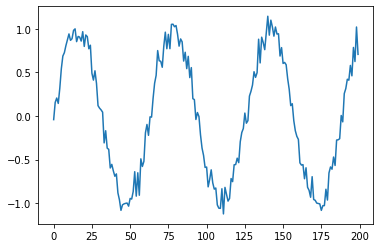

In [40]:
#creating the data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [41]:
print(len(series))

200


In [0]:
T = 10
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:T+t]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)

N = len(X)
  

In [43]:
N

190

In [0]:
#Building the model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

In [0]:
model.compile(
    loss = 'mse',
    optimizer = Adam(0.1)
)

In [46]:
r = model.fit(X[:-N//2],Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 1ms/sample - loss: 0.1507 - val_loss: 0.0406
Epoch 2/80
95/95 [==============================] - 0s 104us/sample - loss: 0.0754 - val_loss: 0.0386
Epoch 3/80
95/95 [==============================] - 0s 108us/sample - loss: 0.0852 - val_loss: 0.0924
Epoch 4/80
95/95 [==============================] - 0s 107us/sample - loss: 0.0649 - val_loss: 0.0782
Epoch 5/80
95/95 [==============================] - 0s 103us/sample - loss: 0.0717 - val_loss: 0.0360
Epoch 6/80
95/95 [==============================] - 0s 101us/sample - loss: 0.0562 - val_loss: 0.0293
Epoch 7/80
95/95 [==============================] - 0s 136us/sample - loss: 0.0376 - val_loss: 0.0514
Epoch 8/80
95/95 [==============================] - 0s 126us/sample - loss: 0.0437 - val_loss: 0.0374
Epoch 9/80
95/95 [==============================] - 0s 106us/sample - loss: 0.0466 - val_loss: 0.0319
Epoch 10/80
95/95 [=====================

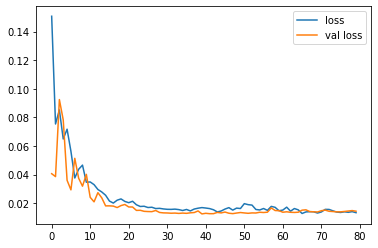

In [47]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

In [0]:
# The wrong way of prediction
validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  #updating the prediction list
  validation_predictions.append(p) 

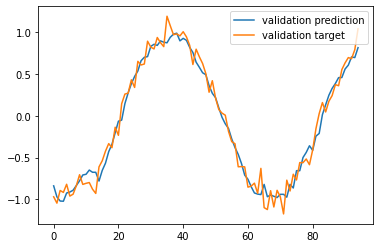

In [35]:
plt.plot(validation_predictions, label='validation prediction')
plt.plot(validation_target, label = 'validation target')
plt.legend()

In [0]:
#forecasting future values by using self-predictions only
validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  #updating the prediction list
  validation_predictions.append(p) 
  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

  

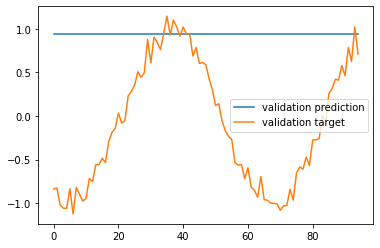

In [50]:
plt.plot(validation_predictions, label='validation prediction')
plt.plot(validation_target, label = 'validation target')
plt.legend()